In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv(r'country_data_kmeans.csv')
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df = dataset.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df[['country', 'child_mort']].sort_values(by='child_mort', ascending=False).tail()

,country,child_mort
53,Finland,3.0
144,Sweden,3.0
133,Singapore,2.8
91,Luxembourg,2.8
68,Iceland,2.6


In [6]:
label_encode = LabelEncoder()
df['country'] = label_encode.fit_transform(df['country'])

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df_cl = df.copy()

In [9]:
df_cl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df['country'].isnull().sum()

0

In [11]:
df['child_mort'].isnull().sum()

0

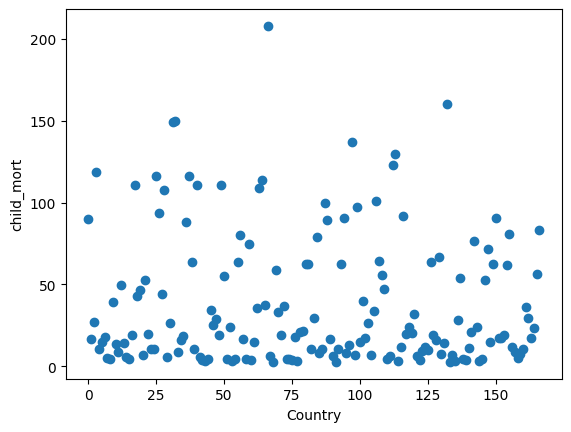

In [12]:
# displaying in the 'scatterplot'
plt.scatter(df.country, df.child_mort)
plt.xlabel("Country")
plt.ylabel("child_mort")
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
k_means = KMeans(n_clusters=3)
y_predict = k_means.fit_predict(df[['country', 'child_mort']])
y_predict

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# adding new clusters columns in the dataset
df['clusters'] = y_predict
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [16]:
# finding the center of each clusters
k_means.cluster_centers_

array([[129.65714286,  25.73714286],
       [ 42.74626866,  19.65223881],
       [ 64.03333333, 109.09333333]])

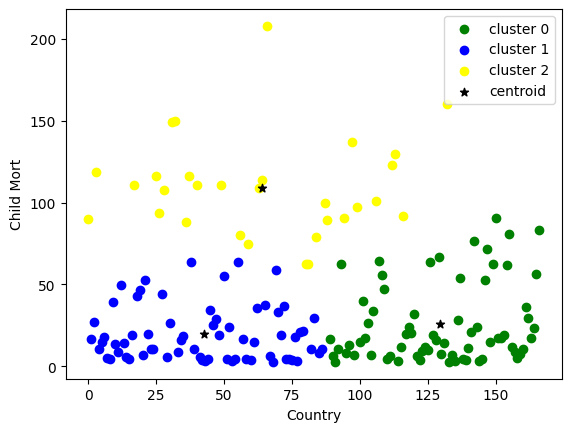

In [17]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]


plt.scatter(df0.country, df0.child_mort, color="green", label="cluster 0")
plt.scatter(df1.country, df1.child_mort, color="blue", label="cluster 1")
plt.scatter(df2.country, df2.child_mort, color="yellow", label="cluster 2")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='black',marker='*',label='centroid')



plt.xlabel("Country")
plt.ylabel("Child Mort")
plt.legend()
plt.show()

In [18]:
scalar = MinMaxScaler()   # for scale 

scalar.fit(df[['country']])
df['country'] = scalar.transform(df[['country']])

scalar.fit(df[['child_mort']])
df['child_mort'] = scalar.transform(df[['child_mort']])

In [19]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0.000000,0.426485,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,0.006024,0.068160,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,0.012048,0.120253,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,0.018072,0.566699,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,0.024096,0.037488,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['country','child_mort']])
    sse.append(k_means.inertia_)

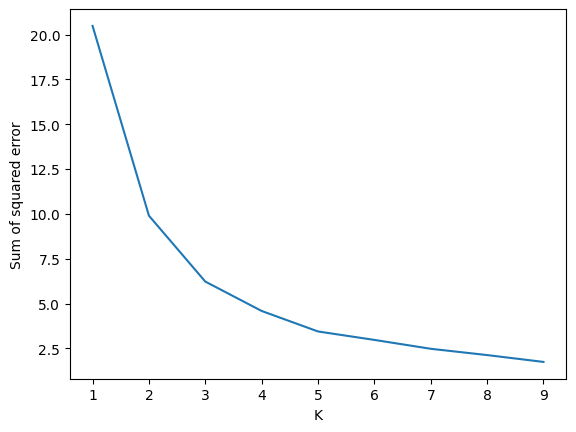

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [22]:
# now taking the cluster '5' because cluster '3' doesnot provide the accuracy
k_means = KMeans(n_clusters=5)
y_predict = k_means.fit_predict(df[['country', 'child_mort']])
y_predict

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3])

In [23]:
# adding new clusters columns in the dataset
df['clusters'] = y_predict
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0.000000,0.426485,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,0.006024,0.068160,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,0.012048,0.120253,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,0.018072,0.566699,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,0.024096,0.037488,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [24]:
# finding the center of each clusters
k_means.cluster_centers_

array([[0.83525406, 0.07584353],
       [0.14689527, 0.08881981],
       [0.22395464, 0.54550662],
       [0.70098576, 0.42150571],
       [0.46791818, 0.08144064]])

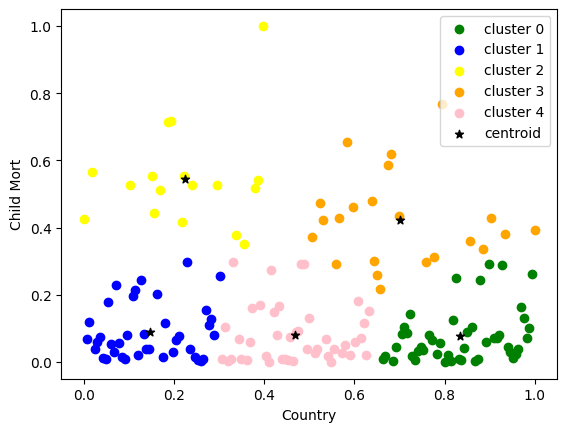

In [25]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]
df3 = df[df.clusters==3]
df4 = df[df.clusters==4]


plt.scatter(df0.country, df0.child_mort, color="green", label="cluster 0")
plt.scatter(df1.country, df1.child_mort, color="blue", label="cluster 1")
plt.scatter(df2.country, df2.child_mort, color="yellow", label="cluster 2")
plt.scatter(df3.country, df3.child_mort, color="orange", label="cluster 3")
plt.scatter(df4.country, df4.child_mort, color="pink", label="cluster 4")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='black',marker='*',label='centroid')



plt.xlabel("Country")
plt.ylabel("Child Mort")
plt.legend()
plt.show()

In [26]:
scalar = MinMaxScaler()   # for scale 

scalar.fit(df[['country']])
df['country'] = scalar.transform(df[['country']])

scalar.fit(df[['child_mort']])
df['child_mort'] = scalar.transform(df[['child_mort']])

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['country','child_mort']])
    sse.append(k_means.inertia_)

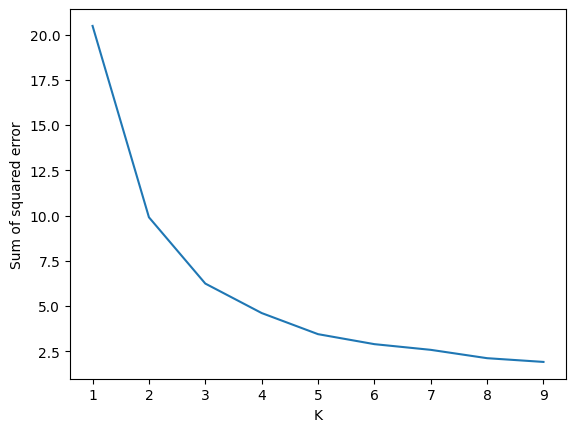

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# now doing the 'gdp' and 'inflation' clustering 

In [29]:
from sklearn.cluster import KMeans

In [30]:
df_cl = dataset.copy()

In [31]:
df_cl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
label_encode = LabelEncoder()
df_cl['country'] = label_encode.fit_transform(df_cl['country'])

In [33]:
k_mean = KMeans(n_clusters=3)
y_pre = k_mean.fit_predict(df[['inflation', 'gdpp']])
y_pre

array([0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

In [34]:
# adding new clusters columns in the dataset
df_cl['clusters'] = y_pre
df_cl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [35]:
# finding the center of each clusters
k_mean.cluster_centers_

array([[9.34084685e+00, 3.17490090e+03],
       [3.11170833e+00, 5.12875000e+04],
       [5.87659375e+00, 1.81781250e+04]])

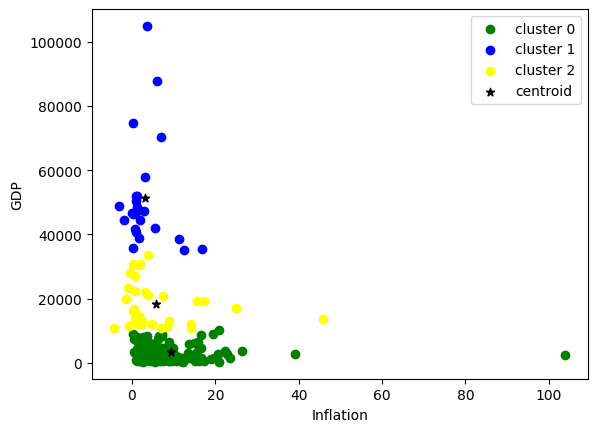

In [36]:
df0 = df_cl[df_cl.clusters==0]
df1 = df_cl[df_cl.clusters==1]
df2 = df_cl[df_cl.clusters==2]

plt.scatter(df0.inflation, df0.gdpp, color="green", label="cluster 0")  # inflation', 'gdpp
plt.scatter(df1.inflation, df1.gdpp, color="blue", label="cluster 1")
plt.scatter(df2.inflation, df2.gdpp, color="yellow", label="cluster 2")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.xlabel("Inflation")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [37]:
# defining the scalar
scalar = MinMaxScaler()   # for scale 

scalar.fit(df[['inflation']])
df['inflation'] = scalar.transform(df[['inflation']])

scalar.fit(df[['gdpp']])
df['gdpp'] = scalar.transform(df[['gdpp']])

In [38]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df[['country','child_mort']])
    sse.append(k_means.inertia_)

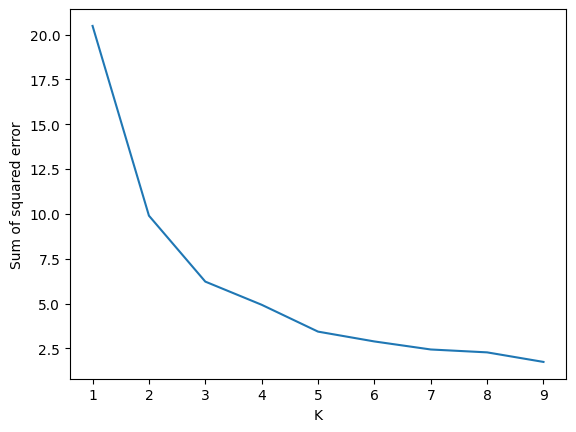

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)